In [47]:
import ipywidgets as widgets
from ipywidgets import Checkbox, VBox
import vaex
import vaex.jupyter
import numpy as np
import pylab as plt

%matplotlib inline

df = vaex.from_csv("testdata.csv")

tagList = [(df.tag == 0), (df.tag == 1), (df.tag == 2)]
selectionList = []

val = 2

for i in range(len(tagList)):
    selectionList.append(tagList[i])

def remove(target):
    for i in range(len(selectionList)):
        if(selectionList[i] is target):
            selectionList.pop(i)
            break

def changeDS1(change):
    if(change.name == 'value'):
        if(change.new == True):
            selectionList.append(tagList[0])
        else:
            remove(tagList[0])
        df.select(True)
        
    
def changeDS2(change):
    if(change.name == 'value'):
        if(change.new == True):
            selectionList.append(tagList[1])
        else:
            remove(tagList[1])
        df.select(True)
        
def changeDS3(change):
    if(change.name == 'value'):
        if(change.new == True):
            selectionList.append(tagList[2])
        else:
            remove(tagList[2])
        df.select(True)

options = ['DS1', 'DS2', 'DS3']
items = [Checkbox(description=ds, value=True, disabled=False, indent=False) for ds in options]
items[0].observe(changeDS1)
items[1].observe(changeDS2)
items[2].observe(changeDS3)
checks = VBox(items)

selection = df.select(True)
@vaex.jupyter.interactive_selection(df)
def plot(*args, **kwargs):
    if(len(selectionList)):
        df.plot(df.x, df.y, what=np.log(vaex.stat.count()+1), selection=selectionList)
    else:
        df.plot(df.x, df.y, what=np.log(vaex.stat.count()+1), selection=[df.x < -1])
    plt.show()
    
display(checks)

Output()

3
2


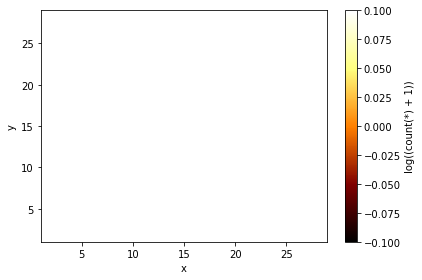

In [45]:
df = vaex.from_csv("testdata.csv")

selectionA = [(df.tag == 0), (df.tag == 1), (df.tag == 2)]
print(len(selectionA))
selectionA.remove(df.tag == 0)
print(len(selectionA))

df.plot(df.x, df.y, what=np.log(vaex.stat.count()+1), selection=[df.x == -1])
